### Esercizio 04.1

1. Per prima cosa ho aggiunto la possibilità di ricominciare la simulazione utilizzando l'ultima  configurazione (file: old.final) e la penultima configurazione (file: old.0) di una simulazione precedentemente effettuata. Per ricominciare basta selezionare "restart".

2. Insieme a questo ho aggiunto la possibilità di riscalare le velocità utilizzando la temperatura target, in modo che il sistema vada all'equilibrio a quella temperatura: digitando "yes" da terminale quando richiesto, il codice con le posizioni r(t) e r(t-dt) fa un passo dell'algoritmo di Verlet trovando r(t+dt). Poi calcola la velocità media per particella sapendo che per ognuna vale $v(t)=\frac{r(t+dt)-r(t)}{dt}$ e la riscala utilizzando $fs=\sqrt{\frac{T^\star}{T}}=\sqrt{\frac{3T^\star}{\langle v^2 \rangle}}$ nel seguente modo $\langle v_{rs} \rangle=fs\langle v \rangle$. A questo punto le posizioni r(t) vengono sostituite con $r_{new}(t)=r(t+dt)-\langle v_{rs} \rangle dt$ e la simulazione incomincia.

Il processo completo l'ho effettuato nel seguente modo:
1. Ho selezionato per la prima volta l'opzione "new" e il codice effettua una simulazione partendo da una configurazione di solido perfetto (file: conf.0).
2. Ho cominciato a termalizzare il sistema selezionado l'opzione "restart" e scegliendo di riscalare le velocità per forzare l'equilibrio alla temperatura target. Ho ripetuto la procedura riscalamento fino a che il sistema non era all'equilibrio. Il numero di simulazioni necessarie per termalizzare varia a seconda dei parametri in input, sono andato a tentivi nei vari casi. Quando ho visto che il sistema andava all'equilibrio molto vicino alla temperatura target ho effettuato una simulazione in più e se con questa l'equilibrio era perso il numero di simulazioni necessarie era quelle effettuate meno una.
3. Dopo la termalizzazione ho fatto la simulazione MD partendo dalla vecchia configurazione equilibrata, senza riscalare le velocità. 

Riporto un esempio di termalizzazione partendo da una configurazione di cristallo perfetto con i parametri di una fase solida (file: "input.solid") che sono:
- $T=1.9$
- numero di particelle $npart=108$
- densità $\rho=0.8$
- raggio di cutoff $r_{cut}=2.5$
- passo temporale per l'algoritmo di verlet $\delta t=0.0005$

Mostro di seguito 5 grafici uno per simulazione, di temperatura e energia cinetica mediate sui blocchi al variare del numero di blocchi. Ho scelto di utilizzare le medie perchè i valori istantanei di queste grandezze si muovono molto e non si riusciva a capire bene quando il sistema fosse all' equilibrio.

Ho utilizzato $M=10^4$ passi e ho effettuato una misura ogni 10, quindi ho ottenuto 1000 misure che ho poi diviso in $N=100$ blocchi.


I grafici mostrano come dopo 5 simulazioni il sistema sia all'equilibrio alla temperatura target. Infatti $T \simeq 1.9$ e  l' energia cinetica varia molto poco all'aumentare dei blocchi.



Temperatura finale:  1.89892 ( 0.00599715 )


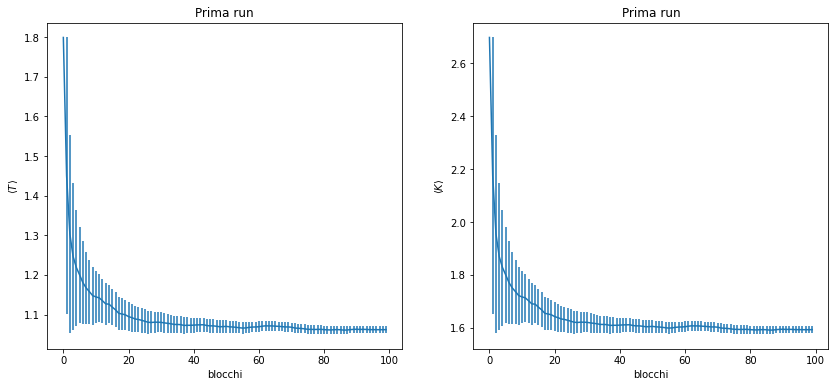

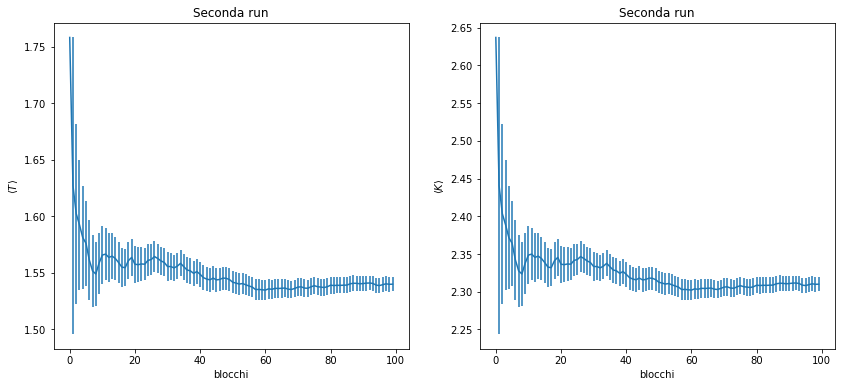

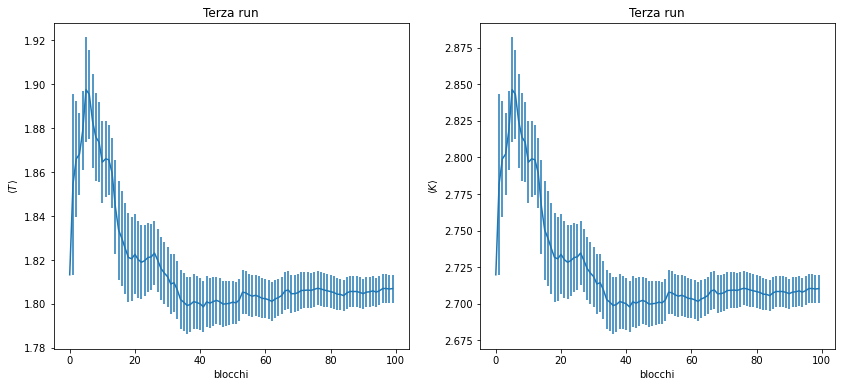

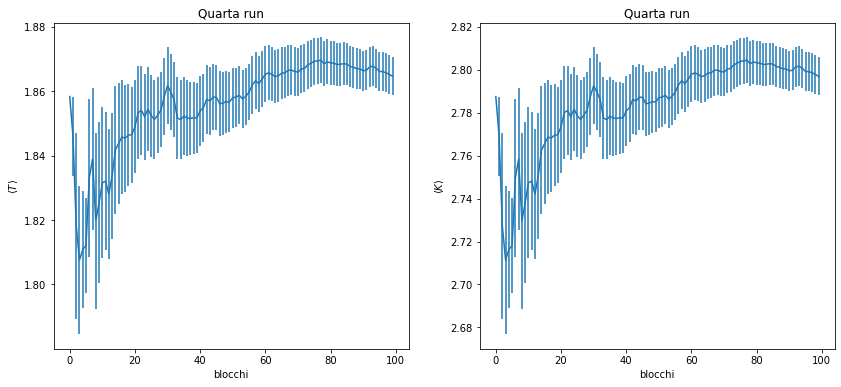

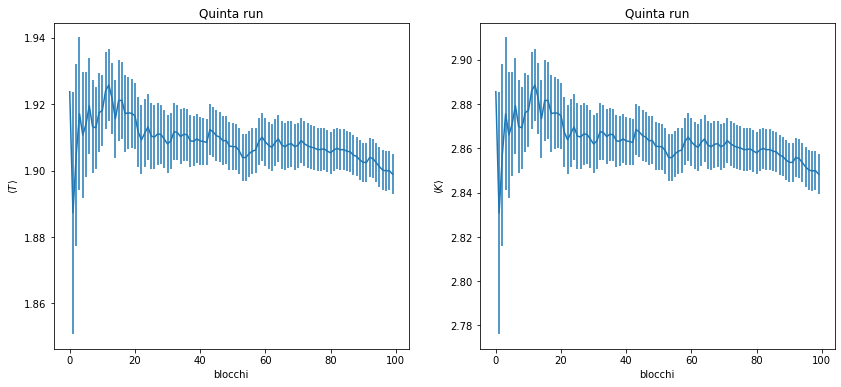

In [19]:
import matplotlib.pyplot as plt
import numpy as np

with open("Termalizzazione/T_Therm.0") as out_T_0:
    T_0=np.loadtxt(out_T_0,usecols=(0,1),dtype=float)
with open("Termalizzazione/T_Therm.1") as out_T_1:
    T_1=np.loadtxt(out_T_1,usecols=(0,1),dtype=float)
with open("Termalizzazione/T_Therm.2") as out_T_2:
    T_2=np.loadtxt(out_T_2,usecols=(0,1),dtype=float)
with open("Termalizzazione/T_Therm.3") as out_T_3:
    T_3=np.loadtxt(out_T_3,usecols=(0,1),dtype=float)
with open("Termalizzazione/T_Therm.4") as out_T_4:
    T_4=np.loadtxt(out_T_4,usecols=(0,1),dtype=float)
    
with open("Termalizzazione/K_Therm.0") as out_K_0:
    K_0=np.loadtxt(out_K_0,usecols=(0,1),dtype=float)
with open("Termalizzazione/K_Therm.1") as out_K_1:
    K_1=np.loadtxt(out_K_1,usecols=(0,1),dtype=float)
with open("Termalizzazione/K_Therm.2") as out_K_2:
    K_2=np.loadtxt(out_K_2,usecols=(0,1),dtype=float)
with open("Termalizzazione/K_Therm.3") as out_K_3:
    K_3=np.loadtxt(out_K_3,usecols=(0,1),dtype=float)
with open("Termalizzazione/K_Therm.4") as out_K_4:
    K_4=np.loadtxt(out_K_4,usecols=(0,1),dtype=float)
    
x=np.arange(100)

print("Temperatura finale: ",T_4[T_4[:,0].size-1,0],"(",T_4[T_4[:,0].size-1,1],")")


fig1=plt.figure(figsize=(14,6))
ax1=fig1.add_subplot(1,2,1)
ax2=fig1.add_subplot(1,2,2)
ax1.errorbar(x,T_0[:,0],yerr=T_0[:,1])
ax1.set_title("Prima run")
ax1.set_xlabel("blocchi")
ax1.set_ylabel(r"$\langle T \rangle$")


ax2.errorbar(x,K_0[:,0],yerr=K_0[:,1])
ax2.set_title("Prima run")
ax2.set_xlabel("blocchi")
ax2.set_ylabel(r"$\langle K \rangle$")
plt.show()


fig2=plt.figure(figsize=(14,6))
ax1=fig2.add_subplot(1,2,1)
ax2=fig2.add_subplot(1,2,2)
ax1.errorbar(x,T_1[:,0],yerr=T_1[:,1])
ax1.set_title("Seconda run")
ax1.set_xlabel("blocchi")
ax1.set_ylabel(r"$\langle T \rangle$")


ax2.errorbar(x,K_1[:,0],yerr=K_1[:,1])
ax2.set_title("Seconda run")
ax2.set_xlabel("blocchi")
ax2.set_ylabel(r"$\langle K \rangle$")
plt.show()

fig3=plt.figure(figsize=(14,6))
ax1=fig3.add_subplot(1,2,1)
ax2=fig3.add_subplot(1,2,2)
ax1.errorbar(x,T_2[:,0],yerr=T_2[:,1])
ax1.set_title("Terza run")
ax1.set_xlabel("blocchi")
ax1.set_ylabel(r"$\langle T \rangle$")


ax2.errorbar(x,K_2[:,0],yerr=K_2[:,1])
ax2.set_title("Terza run")
ax2.set_xlabel("blocchi")
ax2.set_ylabel(r"$\langle K \rangle$")
plt.show()

fig4=plt.figure(figsize=(14,6))
ax1=fig4.add_subplot(1,2,1)
ax2=fig4.add_subplot(1,2,2)
ax1.errorbar(x,T_3[:,0],yerr=T_3[:,1])
ax1.set_title("Quarta run")
ax1.set_xlabel("blocchi")
ax1.set_ylabel(r"$\langle T \rangle$")


ax2.errorbar(x,K_3[:,0],yerr=K_3[:,1])
ax2.set_title("Quarta run")
ax2.set_xlabel("blocchi")
ax2.set_ylabel(r"$\langle K \rangle$")
plt.show()

fig5=plt.figure(figsize=(14,6))
ax1=fig5.add_subplot(1,2,1)
ax2=fig5.add_subplot(1,2,2)
ax1.errorbar(x,T_4[:,0],yerr=T_4[:,1])
ax1.set_title("Quinta run")
ax1.set_xlabel("blocchi")
ax1.set_ylabel(r"$\langle T \rangle$")


ax2.errorbar(x,K_4[:,0],yerr=K_4[:,1])
ax2.set_title("Quinta run")
ax2.set_xlabel("blocchi")
ax2.set_ylabel(r"$\langle K \rangle$")
plt.show()


### Esercizio 04.2
Il codice effettua le misurazioni di $T, E/N, K/N, U/N$ ogni 10 steps, quindi si ottengono 1000 valori di ogni parametro. Per valutare l'errore ho diviso questi 1000 valori in 100 blocchi da 10. Ho effettuato la media a blocchi e ottendo $T, E/N, K/N, U/N$ con i loro errori. I risultati ottenuti al variare del numero di steps sono riportati nei file <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span> come richiesto.

### Esercizio 4.3
 Finito di aggiornare il mio codice MD ho equilibrato e effettuato la simulazione con un modello Lennard-Jones dell' Argon nei tre stati solido, liquido e gassoso.
 
La fase di termalizzazione è diversa per ogni stato e richiede un numero di simulazioni differente, in tutti i casi sono partito da una configurazione di cristallo perfetto:

1. Fase solida: quattro simulazioni.

2. Fase liquida: cinque simulazioni .

3. Fase gassosa: due simulazioni.

Riporto i valori di $T, E/N, K/N, U/N$ medi con le loro incertezze al variare del numero di blocchi per ogni stato.

I risultati finali sono in unità di misura del SI.

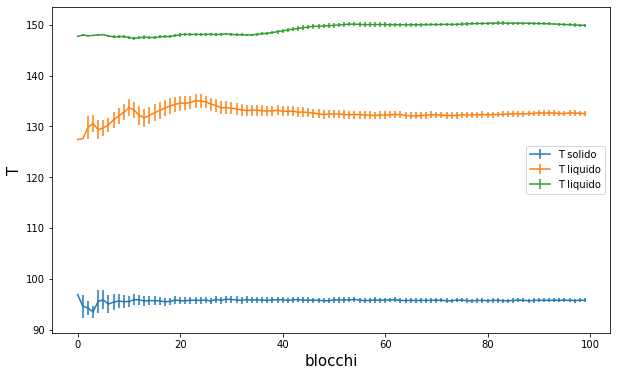

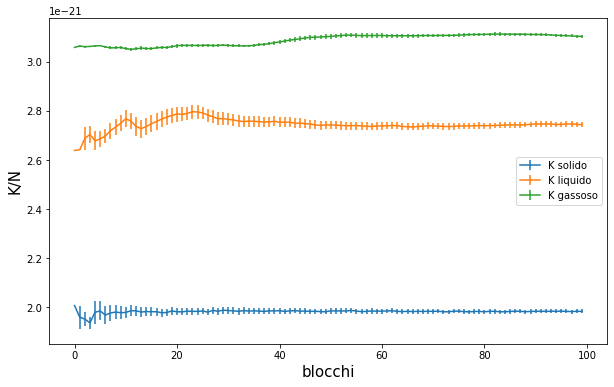

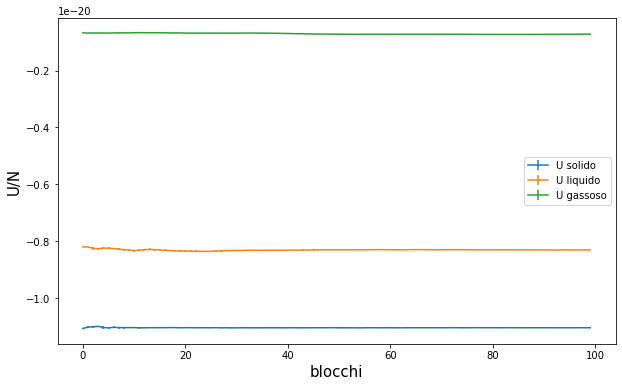

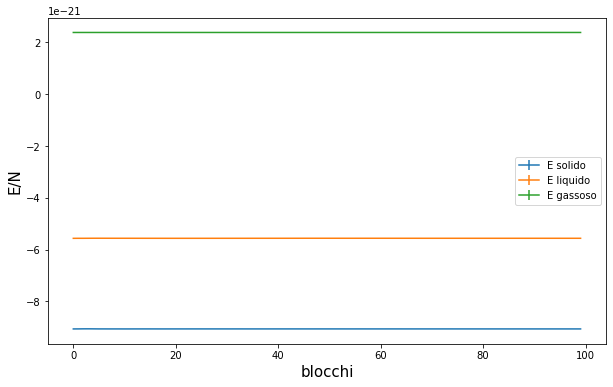

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import k

#solido
with open("ArgonSolido/ave_ekin.out") as Sout_ekin:
    SK=np.loadtxt(Sout_ekin,usecols=(0,1),dtype=float)
with open("ArgonSolido/ave_etot.out") as Sout_etot:
    SE=np.loadtxt(Sout_etot,usecols=(0,1),dtype=float)
with open("ArgonSolido/ave_epot.out") as Sout_epot:
    SU=np.loadtxt(Sout_epot,usecols=(0,1),dtype=float)
with open("ArgonSolido/ave_temp.out") as Sout_temp:
    ST=np.loadtxt(Sout_temp,usecols=(0,1),dtype=float)

#liquido
with open("ArgonLiquido/ave_ekin.out") as Lout_ekin:
    LK=np.loadtxt(Lout_ekin,usecols=(0,1),dtype=float)
with open("ArgonLiquido/ave_etot.out") as Lout_etot:
    LE=np.loadtxt(Lout_etot,usecols=(0,1),dtype=float)
with open("ArgonLiquido/ave_epot.out") as Lout_epot:
    LU=np.loadtxt(Lout_epot,usecols=(0,1),dtype=float)
with open("ArgonLiquido/ave_temp.out") as Lout_temp:
    LT=np.loadtxt(Lout_temp,usecols=(0,1),dtype=float)

#gassoso
with open("ArgonGassoso/ave_ekin.out") as Gout_ekin:
    GK=np.loadtxt(Gout_ekin,usecols=(0,1),dtype=float)
with open("ArgonGassoso/ave_etot.out") as Gout_etot:
    GE=np.loadtxt(Gout_etot,usecols=(0,1),dtype=float)
with open("ArgonGassoso/ave_epot.out") as Gout_epot:
    GU=np.loadtxt(Gout_epot,usecols=(0,1),dtype=float)
with open("ArgonGassoso/ave_temp.out") as Gout_temp:
    GT=np.loadtxt(Gout_temp,usecols=(0,1),dtype=float)


#Unità SI
eps=120*k

# solido
ST *= eps/k
SU *= eps
SK *= eps
SE *= eps

#liquido
LT *= eps/k
LU *= eps
LK *= eps
LE *= eps

#gassoso
GT *= eps/k
GU *= eps
GK *= eps
GE *= eps


#plot
x=np.arange(100)

plt.figure(figsize=(10,6))
plt.errorbar(x,ST[:,0],yerr=ST[:,1],label='T solido')
plt.errorbar(x,LT[:,0],yerr=LT[:,1],label='T liquido')
plt.errorbar(x,GT[:,0],yerr=GT[:,1],label='T liquido')
plt.xlabel("blocchi",fontsize=15)
plt.ylabel("T",fontsize=15)
plt.legend()

plt.show()

plt.figure(figsize=(10,6))
plt.errorbar(x,SK[:,0],yerr=SK[:,1],label='K solido')
plt.errorbar(x,LK[:,0],yerr=LK[:,1],label='K liquido')
plt.errorbar(x,GK[:,0],yerr=GK[:,1],label='K gassoso')
plt.xlabel("blocchi",fontsize=15)
plt.ylabel("K/N",fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.errorbar(x,SU[:,0],yerr=SU[:,1],label='U solido')
plt.errorbar(x,LU[:,0],yerr=LU[:,1],label='U liquido')
plt.errorbar(x,GU[:,0],yerr=GU[:,1],label='U gassoso')
plt.xlabel("blocchi",fontsize=15)
plt.ylabel("U/N",fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.errorbar(x,SE[:,0],yerr=SE[:,1],label='E solido')
plt.errorbar(x,LE[:,0],yerr=LE[:,1],label='E liquido')
plt.errorbar(x,GE[:,0],yerr=GE[:,1],label='E gassoso')
plt.xlabel("blocchi",fontsize=15)
plt.ylabel("E/N",fontsize=15)
plt.legend()
plt.show()